In [1]:
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
import scimap as sm
import matplotlib.pyplot as plt


Running SCIMAP  2.0.5


/Users/lukashat/miniforge3/envs/scimap_phenotyping/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
path = '/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/merged_csv/TS-373_IMC04_MGUS_001.csv'
df = pd.read_csv(path)
df.rename(columns={'centroid-0': 'Y_centroid', 'centroid-1': 'X_centroid', 'Object': 'CellID'}, inplace=True)
file_name_with_extension = path.split('/')[-1]
file_name = file_name_with_extension.split('.')[0]
export = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/phenotyping_{file_name}.csv'
df.to_csv(export, header=True, index=False)

In [3]:
df

,CellID,1,2,3,4,5,CD38,Perilipin,Vimentin,B4GALT1,...,193Ir,6,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,near_bone,distance_to_bone
0,1,12611.256510,42.653226,149.143424,63.359603,1.139295,2.820669,2.971790,2.232437,3.080601,...,19.512638,0.721437,15,0.800000,152.600000,6.342285,2.973565,0.883279,False,796.633542
1,2,12441.143928,35.513826,139.217787,65.109079,1.525751,3.221329,1.346206,3.683721,4.887145,...,11.036704,0.705891,34,1.411765,92.205882,10.041538,4.312776,0.903070,False,821.179639
2,3,12346.821700,43.852517,138.385851,63.203138,0.877136,4.646876,2.178688,32.496047,6.667213,...,10.411191,0.661662,19,1.210526,429.421053,6.014860,4.187948,0.717783,False,740.243879
3,4,12482.621169,36.345392,133.994126,61.471153,1.664189,3.848248,1.370344,18.569980,12.310481,...,17.940134,0.832428,13,1.000000,454.307692,5.055901,3.137858,0.784101,False,740.016892
4,5,12264.538818,62.752362,141.809468,61.509918,1.764961,3.057037,4.149075,16.497443,4.102445,...,4.921457,0.489293,20,1.450000,579.350000,5.966574,4.472136,0.661968,False,686.002915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,5215,10923.921303,45.121583,103.816484,50.053921,1.590211,10.947887,2.394866,18.402220,8.011687,...,11.397774,1.224150,29,997.896552,947.931034,9.929387,3.920057,0.918770,True,12.000000
5215,5216,10785.860403,36.439047,106.101371,54.760362,0.917002,4.814325,1.435981,18.098592,8.429509,...,9.092892,0.595868,19,998.263158,976.842105,8.827080,2.855639,0.946225,False,41.000000
5216,5217,10751.281067,35.152922,103.165333,49.405675,3.579267,0.825823,0.464880,0.413801,0.372074,...,4.257600,0.767864,16,998.250000,239.625000,7.088090,2.917016,0.911393,False,329.072940
5217,5218,10846.816211,29.050924,109.420778,47.680234,0.600000,7.472501,2.444672,9.070243,5.768335,...,7.101448,1.550022,5,998.400000,442.000000,3.200000,2.529822,0.612372,False,255.070578


In [4]:
pd.read_csv(export)

,CellID,1,2,3,4,5,CD38,Perilipin,Vimentin,B4GALT1,...,193Ir,6,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,near_bone,distance_to_bone
0,1,12611.256510,42.653226,149.143424,63.359603,1.139295,2.820669,2.971790,2.232437,3.080601,...,19.512638,0.721437,15,0.800000,152.600000,6.342285,2.973565,0.883279,False,796.633542
1,2,12441.143928,35.513826,139.217787,65.109079,1.525751,3.221329,1.346206,3.683721,4.887145,...,11.036704,0.705891,34,1.411765,92.205882,10.041538,4.312776,0.903070,False,821.179639
2,3,12346.821700,43.852517,138.385851,63.203138,0.877136,4.646876,2.178688,32.496047,6.667213,...,10.411191,0.661662,19,1.210526,429.421053,6.014860,4.187948,0.717783,False,740.243879
3,4,12482.621169,36.345392,133.994126,61.471153,1.664189,3.848248,1.370344,18.569980,12.310481,...,17.940134,0.832428,13,1.000000,454.307692,5.055901,3.137858,0.784101,False,740.016892
4,5,12264.538818,62.752362,141.809468,61.509918,1.764961,3.057037,4.149075,16.497443,4.102445,...,4.921457,0.489293,20,1.450000,579.350000,5.966574,4.472136,0.661968,False,686.002915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,5215,10923.921303,45.121583,103.816484,50.053921,1.590211,10.947887,2.394866,18.402220,8.011687,...,11.397774,1.224150,29,997.896552,947.931034,9.929387,3.920057,0.918770,True,12.000000
5215,5216,10785.860403,36.439047,106.101371,54.760362,0.917002,4.814325,1.435981,18.098592,8.429509,...,9.092892,0.595868,19,998.263158,976.842105,8.827080,2.855639,0.946225,False,41.000000
5216,5217,10751.281067,35.152922,103.165333,49.405675,3.579267,0.825823,0.464880,0.413801,0.372074,...,4.257600,0.767864,16,998.250000,239.625000,7.088090,2.917016,0.911393,False,329.072940
5217,5218,10846.816211,29.050924,109.420778,47.680234,0.600000,7.472501,2.444672,9.070243,5.768335,...,7.101448,1.550022,5,998.400000,442.000000,3.200000,2.529822,0.612372,False,255.070578


In [5]:
adata = sm.pp.mcmicro_to_scimap(export,split="area", CellId="CellID", drop_markers = ["HistoneH3", "CD98", " 1", " 2", " 3", " 4", " 5", " 6", "191Ir", "193Ir"])

Loading phenotyping_TS-373_IMC04_MGUS_001.csv


In [6]:
adata.obs

,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,near_bone,distance_to_bone,CellID,imageid
phenotyping_TS-373_IMC04_MGUS_001_1,15,0.800000,152.600000,6.342285,2.973565,0.883279,False,796.633542,1,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_2,34,1.411765,92.205882,10.041538,4.312776,0.903070,False,821.179639,2,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_3,19,1.210526,429.421053,6.014860,4.187948,0.717783,False,740.243879,3,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_4,13,1.000000,454.307692,5.055901,3.137858,0.784101,False,740.016892,4,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_5,20,1.450000,579.350000,5.966574,4.472136,0.661968,False,686.002915,5,phenotyping_TS-373_IMC04_MGUS_001
...,...,...,...,...,...,...,...,...,...,...
phenotyping_TS-373_IMC04_MGUS_001_5215,29,997.896552,947.931034,9.929387,3.920057,0.918770,True,12.000000,5215,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_5216,19,998.263158,976.842105,8.827080,2.855639,0.946225,False,41.000000,5216,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_5217,16,998.250000,239.625000,7.088090,2.917016,0.911393,False,329.072940,5217,phenotyping_TS-373_IMC04_MGUS_001
phenotyping_TS-373_IMC04_MGUS_001_5218,5,998.400000,442.000000,3.200000,2.529822,0.612372,False,255.070578,5218,phenotyping_TS-373_IMC04_MGUS_001


In [7]:
adata = adata[adata.obs['area'] >= 4]

In [8]:
image_path = '/'.join(path.split(sep="/")[:9]) + f"/img/{file_name}.tiff"
mask_path = '/'.join(path.split(sep="/")[:9]) + f"/masks/{file_name}.tiff"

In [10]:
%gui qt

In [11]:
marker_of_interest = 'CD45'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD98'], point_size=3, 
                   seg_mask = mask_path)
# 1.1

In [12]:
marker_of_interest = 'CD3'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
#  1.6

In [14]:
marker_of_interest = 'CD4'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
#  1.9

In [15]:
marker_of_interest = 'CD8'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD4'], point_size=3, 
                   seg_mask = mask_path)
#  2.3

In [16]:
marker_of_interest = 'CD68'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138', 'CD11b'], point_size=3, 
                   seg_mask = mask_path)
#  3.6

In [17]:
marker_of_interest = 'CD11b'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
#  2.1

In [18]:
marker_of_interest = 'CD11c'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['CD138', 'CD3', 'HLA-DR'], point_size=3, 
                   seg_mask = mask_path)
#  0.9

In [37]:
marker_of_interest = 'HLA-DR'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['CD138', 'CD3', 'CD11c'], point_size=3, 
                   seg_mask = mask_path)
#  2.6

In [36]:
marker_of_interest = 'CathepsinK'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CollagenTypeI'], point_size=3, 
                   seg_mask = mask_path)
#  1.5

In [21]:
marker_of_interest = 'MPO'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD68'], point_size=3, 
                   seg_mask = mask_path)
#  3.2

In [22]:
marker_of_interest = 'CD138'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD38'], point_size=3, 
                   seg_mask = mask_path)
#  2.0

In [23]:
marker_of_interest = 'CD38'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD3', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
# 2.0

In [24]:
marker_of_interest = 'CD34'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD138'], point_size=3, 
                   seg_mask = mask_path)
# 1.0

In [25]:
marker_of_interest = 'RUNX2'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CollagenTypeI'], point_size=3, 
                   seg_mask = mask_path)
# 1.0 

In [26]:
marker_of_interest = 'Perilipin'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD36'], point_size=3, 
                   seg_mask = mask_path)
# 1.9

In [10]:
marker_of_interest = 'CD36'
sm.pl.gate_finder (image_path, adata, marker_of_interest,
                   from_gate = 0, to_gate = 5, increment = 0.1, 
                   markers=['HistoneH3', 'CD45', 'CD36'], point_size=3, 
                   seg_mask = mask_path)
# 3.1

In [11]:
manual_gate = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/manual_gates_scimap.csv')
adata = sm.pp.rescale (adata, gate=manual_gate)

/Users/lukashat/miniforge3/envs/scimap_phenotyping/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:100: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



GMM for ['phenotyping_TS-373_IMC04_MGUS_001']
Finding the optimal gate by GMM for Perilipin
Finding the optimal gate by GMM for Vimentin
Finding the optimal gate by GMM for B4GALT1
Finding the optimal gate by GMM for ATP5A
Finding the optimal gate by GMM for HIF1A
Finding the optimal gate by GMM for CS
Finding the optimal gate by GMM for IL32
Finding the optimal gate by GMM for IDO
Finding the optimal gate by GMM for GranzymeK
Finding the optimal gate by GMM for PKM2
Finding the optimal gate by GMM for IRF4
Finding the optimal gate by GMM for GLUT1
Finding the optimal gate by GMM for GranzymeB
Finding the optimal gate by GMM for Ki67
Finding the optimal gate by GMM for CollagenTypeI
Finding the optimal gate by GMM for CPT1A
Finding the optimal gate by GMM for ST6GAL1
Scaling Image phenotyping_TS-373_IMC04_MGUS_001
Scaling CD38
Scaling Perilipin
Scaling Vimentin
Scaling B4GALT1
Scaling MPO
Scaling CathepsinK
Scaling ATP5A
Scaling RUNX2
Scaling HIF1A
Scaling CD11b
Scaling CD45
Scaling CS

/Users/lukashat/miniforge3/envs/scimap_phenotyping/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:330: ImplicitModificationWarning:

Trying to modify attribute `._uns` of view, initializing view as actual.



In [12]:
phenotype = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/phenotyping_scheme_scimap.csv')
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 

Phenotyping Plasma Cells/MM cells
Phenotyping Osteoclasts
Phenotyping Osteoblasts
Phenotyping CD45+
Phenotyping Others
-- Subsetting CD45+
Phenotyping CD3+Tcells
Phenotyping Macrophages/Monocytes
Phenotyping Dendritic Cells
Phenotyping Myeloid/Neutrophils
Phenotyping HSCs/endothelial cells
-- Subsetting CD3+Tcells
Phenotyping CD4+Tcells
Phenotyping CD8+Tcells
-- Subsetting Macrophages/Monocytes
Phenotyping activated Macrophages/Monocytes
-- Subsetting Dendritic Cells
Phenotyping mDCs
-- Subsetting Others
Phenotyping Adipocytes
Consolidating the phenotypes across all groups


/Users/lukashat/miniforge3/envs/scimap_phenotyping/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lukashat/miniforge3/envs/scimap_phenotyping/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/lukashat/miniforge3/envs/scimap_phenotyping/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will

In [13]:
adata.obs['phenotype'].value_counts()

phenotype
CD45+                              973
Others                             726
Osteoclasts                        586
CD4+Tcells                         498
CD8+Tcells                         420
Myeloid/Neutrophils                407
CD3+Tcells                         359
Plasma Cells/MM cells              350
Adipocytes                         319
HSCs/endothelial cells             150
Macrophages/Monocytes              141
activated Macrophages/Monocytes    112
Dendritic Cells                     81
Unknown                             45
Osteoblasts                         39
mDCs                                 8
Name: count, dtype: int64

In [14]:
sm.pl.image_viewer (image_path, adata, overlay = 'phenotype', point_color='white', point_size=3, seg_mask = mask_path)

In [15]:
adata.obs['phenotype'] = adata.obs['phenotype'].astype('category')

In [16]:
sc.tl.dendrogram(adata, groupby='phenotype')

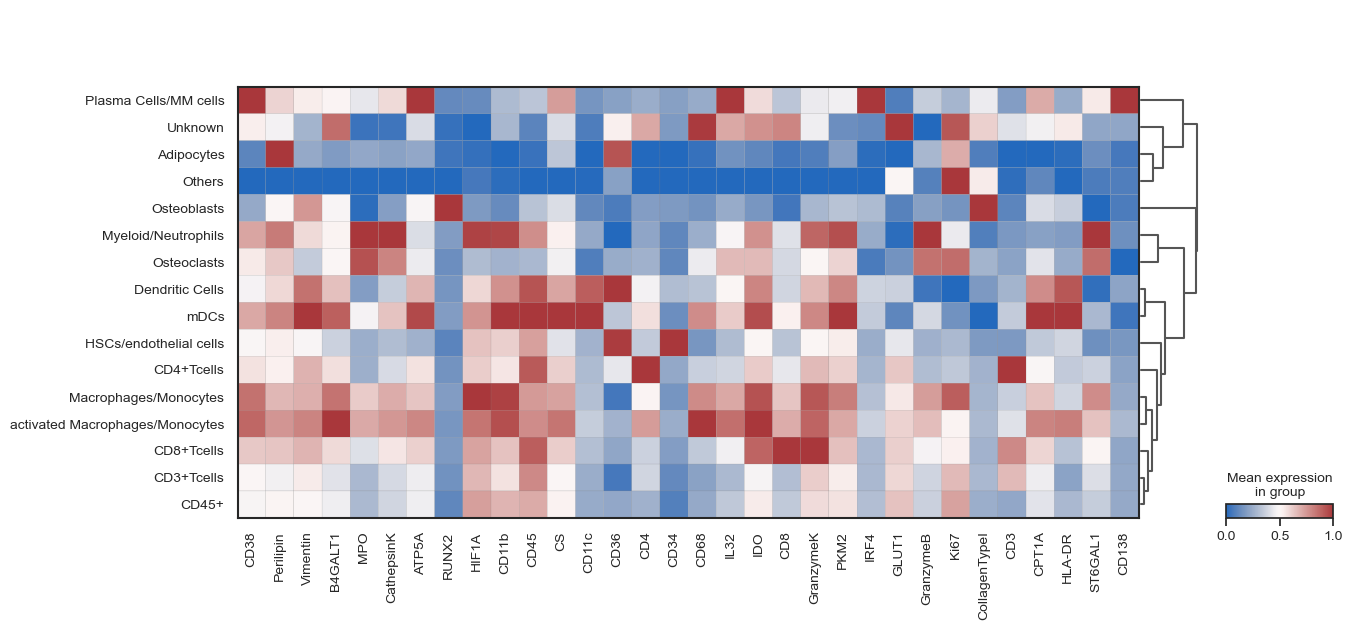

In [17]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='phenotype', dendrogram=True, use_raw=False, cmap="vlag", standard_scale='var')

In [18]:
adata.write(f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/Phenotypes/standard/{file_name}standard.h5ad')